# Background

f_g = f_p

In [1]:
import os
import sys
from pathlib import Path
try:
    sys.path.append(r'C:\Users\qcyus\Dropbox (X-ray Imaging Group)\MyCode\XSIP')
except:
    sys.path.append(Path('/home/peng/Dropbox (X-ray Imaging Group)/MyCode/XSIP'))

from nei import *
try:
    os.chdir(r'C:\Users\qcyus\Dropbox (X-ray Imaging Group)\MyCode\XSIP')
except:
    os.chdir('/home/peng/Dropbox (X-ray Imaging Group)/MyCode/XSIP')

## Look for all solutions by curve and x-axis crossing point

The magic condition is met when 
 theta is  [-93.32999999999997, 7.5458200000014575, 86.67000000000257]


[-93.32999999999997, 7.5458200000014575, 86.67000000000257]

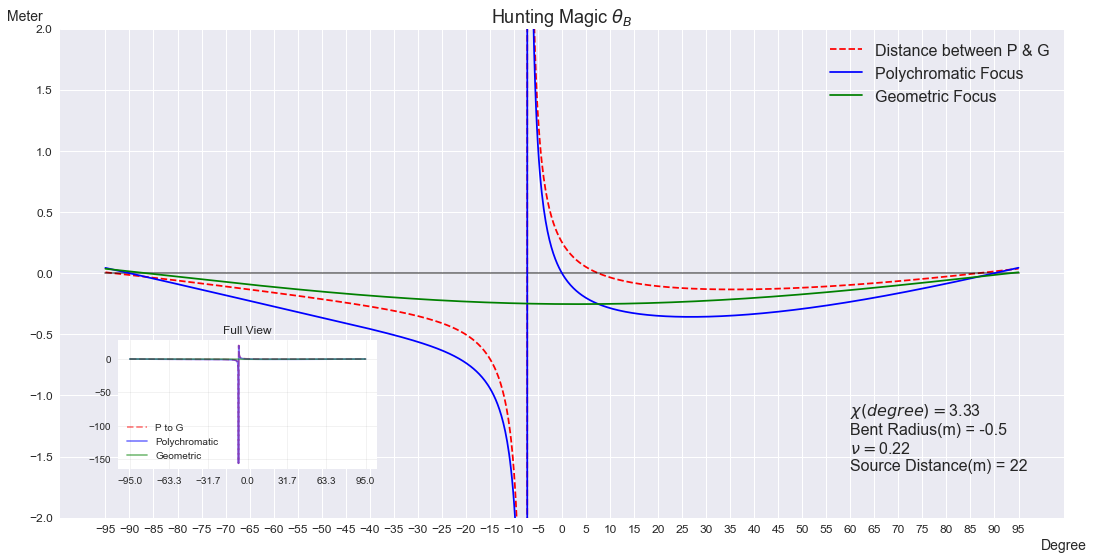

In [3]:

def magic_condition(target='',theta=None, chi = None, R=None, nu=None,f_s=None):
    
    def condition(theta, chi, R, nu, f_s):
        theta = np.radians(theta)
        chi = np.radians(chi)
        # polychromatic focus function
        f_p = (R*np.sin(2.0*theta))/(2.0*np.sin(chi+theta)+(1+nu)*np.sin(2.0*chi)*np.cos(chi+theta))
        # geometric focus function
        f_g = np.cos(chi-theta)/(np.cos(chi+theta)/f_s+2.0/R)
        # magic condition
        condition = f_p-f_g
        return condition,f_p,f_g
    def theta_study():
        theta_range_a = np.arange(-95.0,95.2,0.2)
        scores_range_a,f_p,f_g = condition(theta_range_a,chi,R,nu,f_s)
        magic_thetas = []
        for i in range(len(scores_range_a)-1):
            # find solutions for `condition=0` by looking for the point crosses x-axis
            if scores_range_a[i]==0:# todo
                pass
            if scores_range_a[i]*scores_range_a[i+1]<=0 and ((scores_range_a[i]-scores_range_a[i-1])*(scores_range_a[i+1]-scores_range_a[i]))>0:
                # [1]. Two points are on different sides of the x-axis. [2]. The derivative is not changing sign (stays positive/negative)
                # get condition value of 10000 points in this small range, then get the minimun absolute value
                thetas = np.linspace(theta_range_a[i],theta_range_a[i+1],10001)
                scores,_,_ = condition(thetas,chi,R,nu,f_s)
                magic_theta = thetas[abs(scores).argmin()]
                magic_thetas.append(magic_theta)
        note = '$\\chi(degree) = $'+str(chi)+ '\nBent Radius(m) = '+str(R)+ '\n$\\nu = $'+str(nu)+ '\nSource Distance(m) = '+str(f_s)
        make_plot(theta_range_a,scores_range_a,f_p,f_g,title='Hunting Magic $\\theta_B$',note=note)
        return magic_thetas
    def chi_study():
        chi_range_a = np.arange(-95.0,96.0)
        scores_range_a,f_p,f_g = condition(theta,chi_range_a,R,nu,f_s)
        magic_chis = []
        for i in range(len(scores_range_a)-1):
            # find solutions for `condition=0` by looking for the point crosses x-axis
            if scores_range_a[i]==0:# todo
                pass
            if scores_range_a[i]*scores_range_a[i+1]<=0 and ((scores_range_a[i]-scores_range_a[i-1])*(scores_range_a[i+1]-scores_range_a[i]))>0:
                # [1]. Two points are in different sides on the x-axis. [2]. The derivative is not changing sign (stay positive/negative)
                # get condition value of 10000 points in this small range, then get the minimun absolute value
                chis = np.linspace(chi_range_a[i],chi_range_a[i+1],10001)
                scores,_,_ = condition(theta,chis,R,nu,f_s)
                magic_chi = chis[abs(scores).argmin()]
                magic_chis.append(magic_chi)
        note = '$\\theta_B(degree) = $'+str(theta)+ '\nBent Radius(m) = '+str(R)+ '\n$\\nu = $'+str(nu)+ '\nSource Distance(m) = '+str(f_s)
        make_plot(chi_range_a,scores_range_a,f_p,f_g,title='Hunting Magic $\\chi$',note=note)
        return magic_chis
    def r_study(): # crystal bent radius
        r_range_a = np.append(np.arange(-10.0,-0.1,0.1),np.arange(0.1,10.1,0.1))
        scores_range_a,f_p,f_g = condition(theta,chi,r_range_a,nu,f_s)
        magic_rs = []
        for i in range(len(scores_range_a)-1):
            # find solutions for `condition=0` by looking for the point crosses x-axis
            if scores_range_a[i]==0:# todo
                pass
            if scores_range_a[i]*scores_range_a[i+1]<=0 and ((scores_range_a[i]-scores_range_a[i-1])*(scores_range_a[i+1]-scores_range_a[i]))>0:
                # [1]. Two points are in different sides on the x-axis. [2]. The derivative is not changing sign (stay positive/negative)
                # get condition value of 10000 points in this small range, then get the minimun absolute value
                rs = np.linspace(r_range_a[i],r_range_a[i+1],10001)
                scores,_,_ = condition(theta,chi,rs,nu,f_s)
                magic_r = rs[abs(scores).argmin()]
                magic_rs.append(magic_r)
        if len(magic_rs)>1: # Get rid of the match at 0. When the bent radius is 0, f_p and f_g are both 0. And we dont need this.
            magic_rs = np.array(magic_rs) # transition to numpy array
            to_delete = abs(magic_rs).argmin() # get the index of the '0' value
            magic_rs = np.delete(magic_rs,to_delete).tolist() # delete the '0' value and transition back to list
            
        note = '$\\theta_B(degree) = $'+str(theta)+ '\n$\\chi$(degree) = '+str(chi)+ '\n$\\nu = $'+str(nu)+ '\nSource Distance(m) = '+str(f_s) # the annotation content
#         make_plot(r_range_a,scores_range_a,f_p,f_g,title='Hunting Best Bent Radius',note=note,ylim=10)
        plt.style.use('seaborn')
        fig = plt.figure(figsize=(18,9))
        plt.plot(r_range_a,scores_range_a,linestyle='--',color='r',label='Distance between P & G')
#         plt.plot(r_range_a,np.zeros(len(xdata)),color='k',alpha=0.5)# straight line on x-axis
        plt.xticks(np.linspace(r_range_a[0],r_range_a[-1],21),fontsize=12)
        plt.yticks(fontsize=12)
        plt.xlabel('Crystal Bent Radius',fontsize=14,position=(1.0,1.0))
        plt.ylabel('Meter',fontsize=14,rotation=0,position=(1.0,1.01))
        plt.plot(r_range_a,f_p,label='Polychromatic Focus',color='b')
        plt.plot(r_range_a,f_g,label='Geometric Focus',color='g')
        ylim=1
        plt.ylim(-ylim,ylim)
#         plt.xlim(-1,1)
        plt.legend(prop={'size': 16},loc=1)
        plt.title('Hunting Magic Bent Radius',fontsize=18)
        xytext = [r_range_a[-1]*2/3,-ylim*1.6/2.0]
        plt.annotate(note, xy=(0,0),xytext=xytext,size=16)
        
        # A small plot window
        subplot = fig.add_axes([0.17,0.2,0.2,0.2])
        subplot.set_facecolor('white')
        subplot.plot(r_range_a,scores_range_a,color='r',linestyle='--',alpha=0.5,label='P to G')
        subplot.plot(r_range_a,f_p,color='b',alpha=0.5,label='Polychromatic')
        subplot.plot(r_range_a,f_g,color='g',alpha=0.5,label='Geometric')
        subplot.grid(color='gray',alpha=0.1)
        subplot.set_xticks(np.linspace(r_range_a[0],r_range_a[-1],7))
        subplot.legend()
        subplot.set_title('Full View')

        return magic_rs
    
    def make_plot(xdata,score,f_p,f_g,title='',note='',ylim=2):
        plt.style.use('seaborn')
        fig = plt.figure(figsize=(18,9))
        plt.plot(xdata,score,linestyle='--',color='r',label='Distance between P & G')
        plt.plot(xdata,np.zeros(len(xdata)),color='k',alpha=0.5)# straight line on x-axis
        plt.xticks(np.linspace(xdata[0],xdata[-1],39),fontsize=12)
        plt.yticks(fontsize=12)
        plt.xlabel('Degree',fontsize=14,position=(1.0,1.0))
        plt.ylabel('Meter',fontsize=14,rotation=0,position=(1.0,1.01))
        plt.plot(xdata,f_p,label='Polychromatic Focus',color='b')
        plt.plot(xdata,f_g,label='Geometric Focus',color='g')
        plt.ylim(-ylim,ylim)
        plt.legend(prop={'size': 16})
        plt.title(title,fontsize=18)
        plt.annotate(note, xy=(0,0),xytext=[60,-1.6],size=16)
        
        # A small plot window
        subplot = fig.add_axes([0.17,0.2,0.2,0.2])
        subplot.set_facecolor('white')
        subplot.plot(xdata,score,color='r',linestyle='--',alpha=0.5,label='P to G')
        subplot.plot(xdata,f_p,color='b',alpha=0.5,label='Polychromatic')
        subplot.plot(xdata,f_g,color='g',alpha=0.5,label='Geometric')
        subplot.grid(color='gray',alpha=0.1)
        subplot.set_xticks(np.linspace(xdata[0],xdata[-1],7))
        subplot.legend()
        subplot.set_title('Full View')

    
    if target =='theta' or theta==None:
        target='theta'
        best = theta_study()
    elif target =='chi'or chi==None:
        target='chi'
        best = chi_study()
    elif target =='R' or R==None:
        target='R'
        best = r_study()
    else:
        raise Exception('Choose your target from ["theta","chi","R"]')
    print('The magic condition is met when \n',target,'is ',best)
    return best

magic_condition(target='theta',chi=3.33,R=-0.5,nu=0.22,f_s=22)

The magic condition is met when 
 theta is  [-93.32999999999997, -36.13193999999916, -17.5218199999989, 50.91210000000207, 86.67000000000257]


[-93.32999999999997,
 -36.13193999999916,
 -17.5218199999989,
 50.91210000000207,
 86.67000000000257]

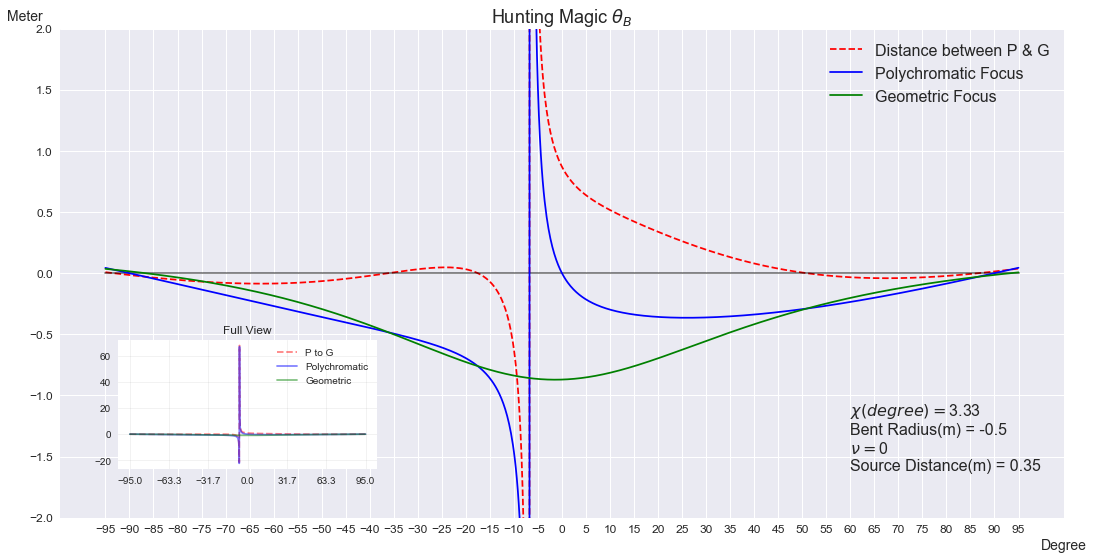

In [13]:
magic_condition(target='theta',chi=3.33,R=-0.5,nu=0,f_s=0.35)

## Test with beam exbander parameters

The magic condition is met when 
 chi is  [3.3319, 82.45]


[3.3319, 82.45]

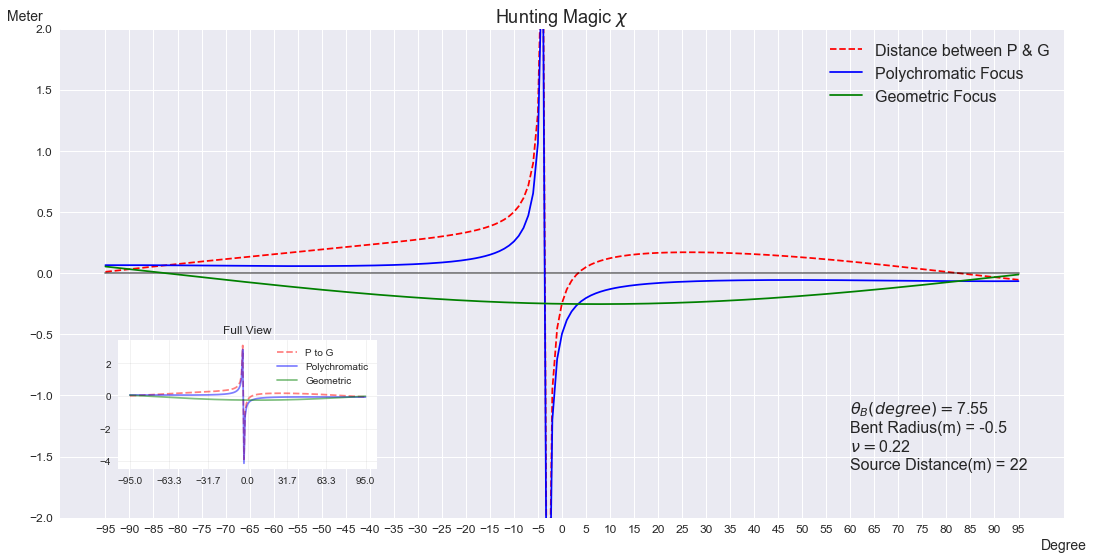

In [3]:
magic_condition(target='chi',theta=7.55,R=-0.5,nu=0.22,f_s=22)

The magic condition is met when 
 R is  [-0.49972000000003375]


[-0.49972000000003375]

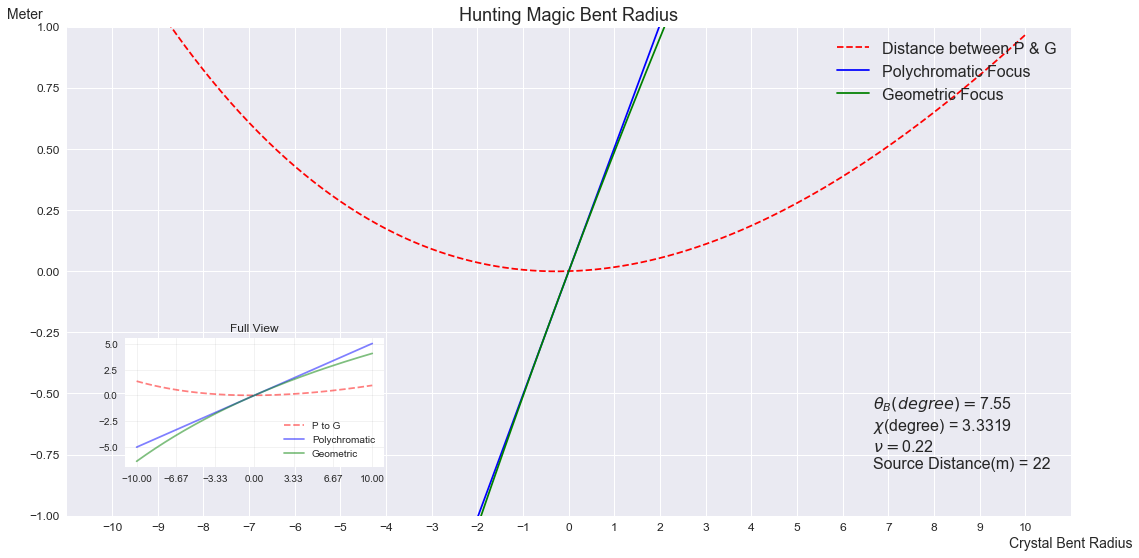

In [18]:
magic_condition(target='R',theta=7.55,chi=3.3319,nu=0.22,f_s=22)

## Test with EDXAS for selenium parameters

### If $\theta_B$ is unknown, what is the best $\theta_B$ to get the MAGIC CONDITION
If we already have a asymmetric cut crystal and a fixed bent radius, what is the energy we can use with magic condition? 

The magic condition is met when 
 theta is  [-95.0, 10.057280000001493, 85.00000000000256]


[-95.0, 10.057280000001493, 85.00000000000256]

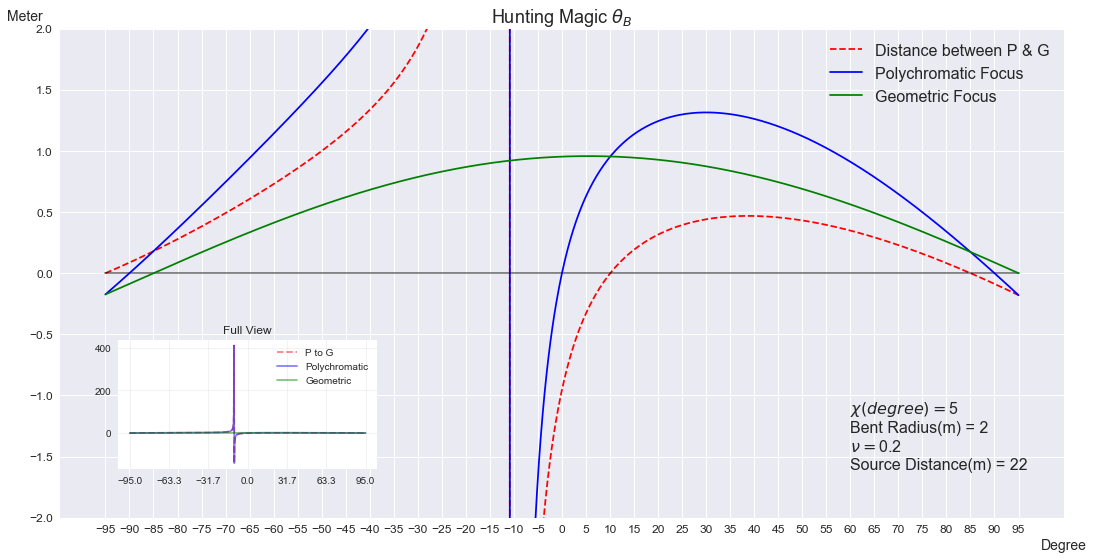

In [4]:
magic_condition(chi=5,R=2,nu=0.2,f_s=22)

### If $\chi$ is unknown, what is the best $\chi$ to get the MAGIC CONDITION 
When we know what enregy we want to study, how ASYMMETRIC do we want the crystal to be?

The magic condition is met when 
 chi is  [4.4671, 81.01]


[4.4671, 81.01]

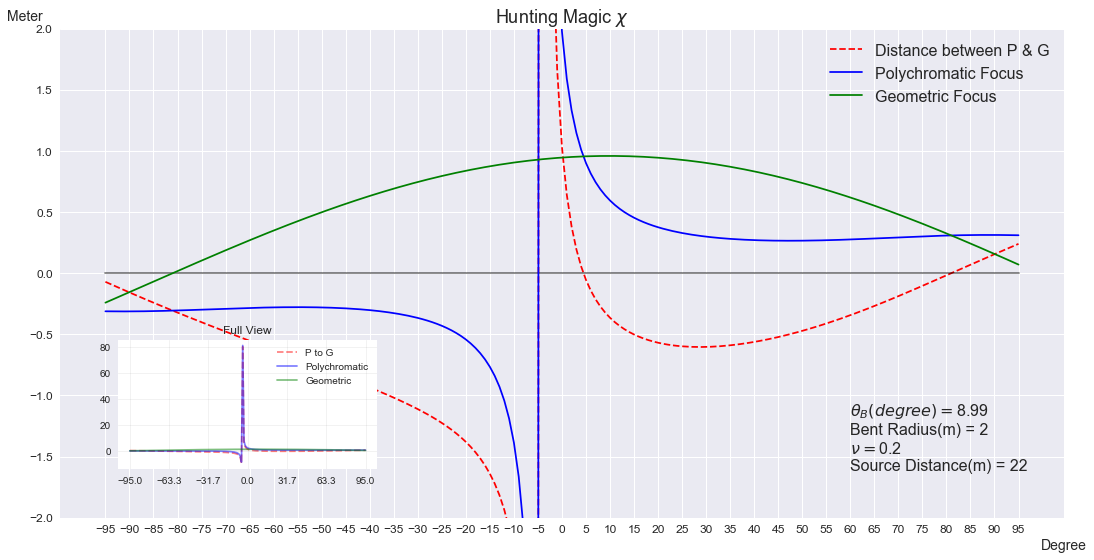

In [20]:
magic_condition(theta=8.99,R=2,nu=0.2,f_s=22)

In [5]:
help(mp.bragg)

Help on function bragg in module math_physics:

bragg(hkl=[1, 1, 1], energy=None, theta=None)
    Calculator for bragg angle and bragg energy. Requires the input of either energy or theta.
    If the input is ENERGY, output will be THETA_B.
    If the input is THETA_B, output will be ENERGY.
    :param hkl: reflection lattice. Default is [1,1,1]
    :param energy: Unit [keV]
    :param theta: Unit [degree]
    :return: Energy[keV] or Theta_b[degree]



The magic condition is met when 
 chi is  [-91.2588, 88.7412]


[-91.2588, 88.7412]

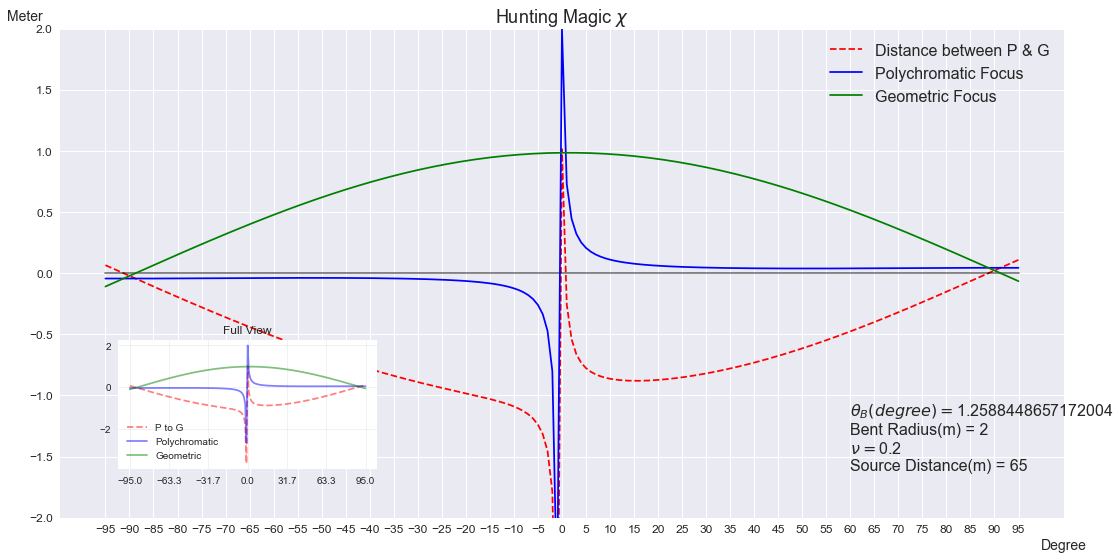

In [21]:
# Calculation for 90 keV
theta = mp.bragg(energy=90,hkl=[1,1,1])
# print(theta)
magic_condition(theta=theta[0],R=2,nu=0.2,f_s=65)

### If $R$ is unknown, what is the best $R$ to get the MAGIC CONDITION
When we have a crystal already, what is the best bent radius? (R=0 is manually eliminated.)

The magic condition is met when 
 R is  [4.8968300000000005]


[4.8968300000000005]

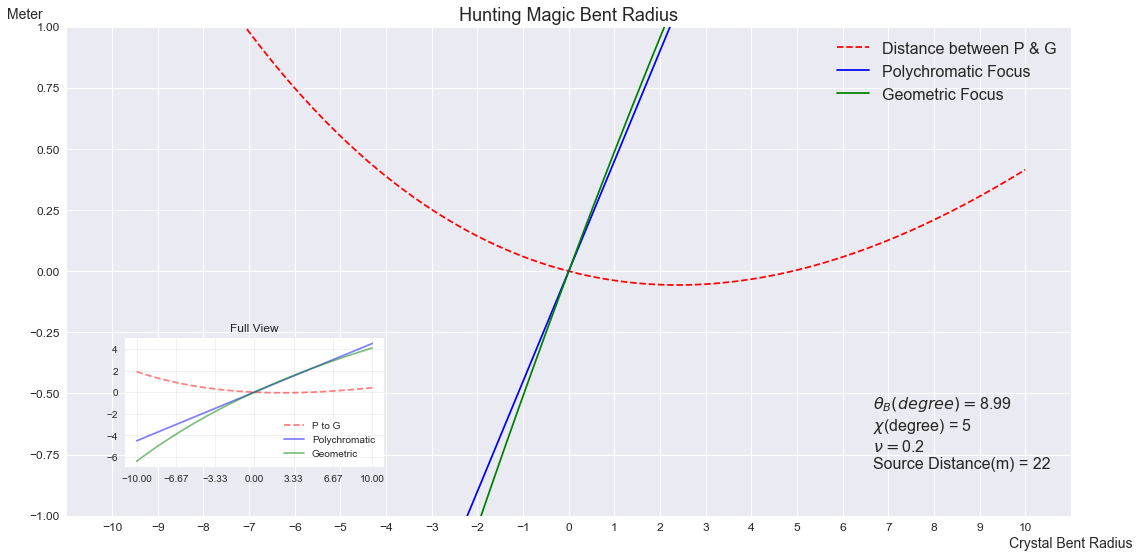

In [21]:
magic_condition(theta=8.99,chi=4.46,nu=0.2,f_s=22)

## Is magic condition possible for Symmetric Laue Geometry?
### >>> ANSWER:  No. When $\chi=0$, the magic condition only happens if theta=90 or -90.  

The magic condition is met when 
 theta is  [-89.99999999999993, 90.00000000000261]


[-89.99999999999993, 90.00000000000261]

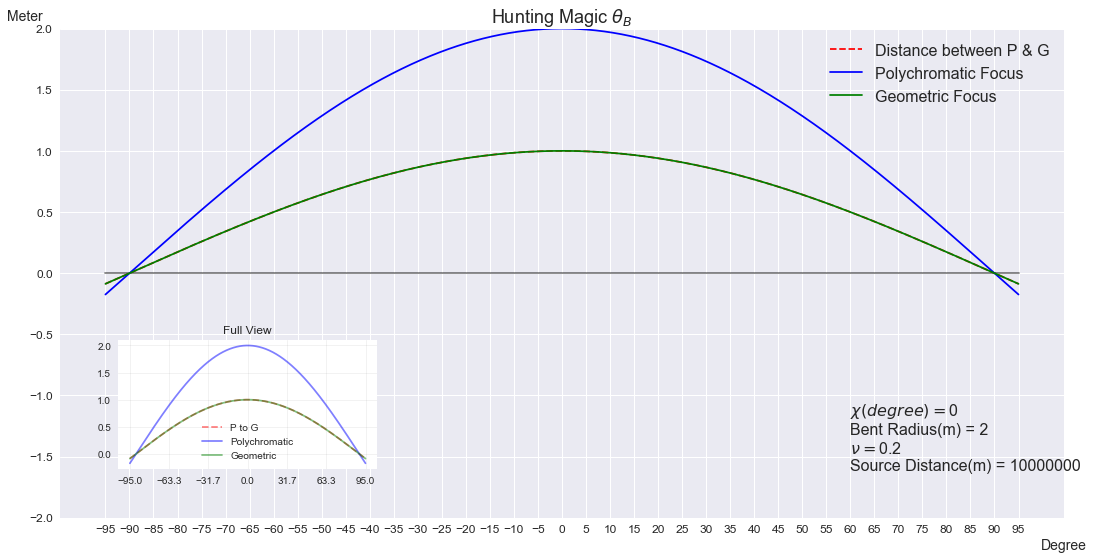

In [47]:
magic_condition(chi=0,nu=0.2,R=2,f_s=10000000)

## When $\nu=0$ ?

The magic condition is met when 
 chi is  [-80.0, -5.0191]


[-80.0, -5.0191]

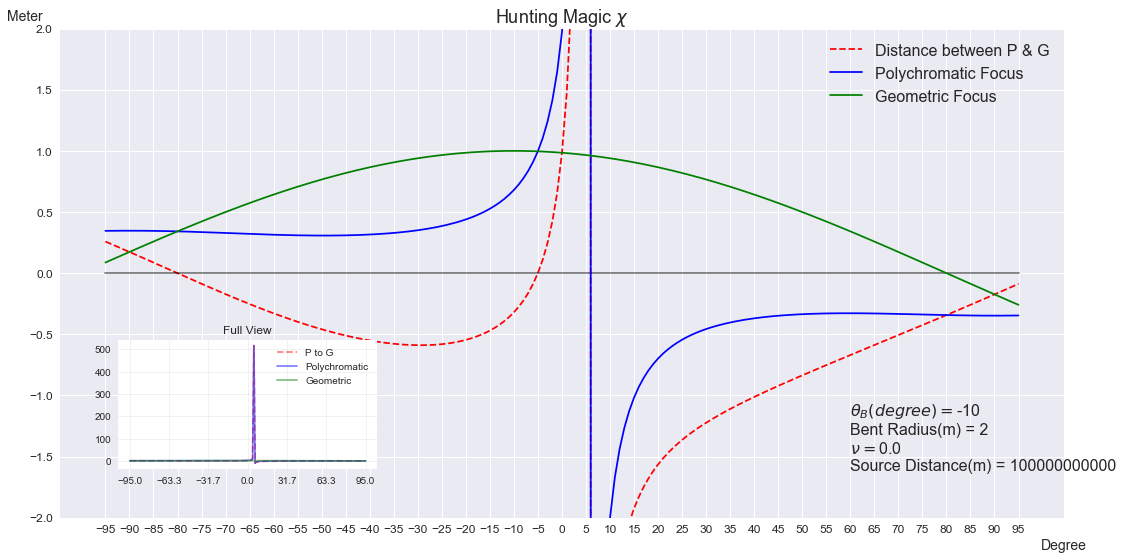

In [44]:
magic_condition(theta=-10,nu=0.0,R=2,f_s=100000000000)

## How good is the focus spot when magic condition is not perfectly met?
#### Use the Vertical Size of the Polychromatic beam at the Geometric focus(2016-Oct-16).
The beam height @ exit of the Borrmann fan is $$\Delta h = T \cdot [\tan(\theta_B + \chi)+\tan(\theta_B - \chi)]$$, where $T$ is the thickness of the crystal, $\theta_B$ is the Bragg angle of the energy reflected at entering the crystal (the top polychromatic ray), $\chi$ is the asymmetric angle.

The radius of the rotation angle between the top and bottom polychromatic reflection from a single ray is  $$\frac{\Delta h}{f_p-T}$$ ($T$ is usually negligible), where $f_p$ is the polychromatic focal distance.
At a distance $\Delta f$ from $f_p$, the Vertical Size of the Polychromatic beam is 
$$\Delta\omega = \Delta f \cdot \frac{\Delta h}{f_p-T} = \frac{\Delta f}{f_p-T} \cdot T \cdot [\tan(\theta_B + \chi)+\tan(\theta_B - \chi)]$$
At the geometric focus, $\Delta f = f_p-f_g$, thus $$\Delta\omega =\frac{f_p-f_g}{f_p-T} \cdot T \cdot [\tan(\theta_B + \chi)+\tan(\theta_B - \chi)]$$



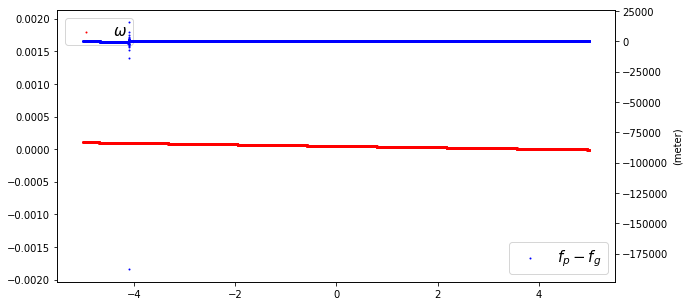

In [23]:
from nei import *
def omega_chi(chi_range=[-90,90],theta=None,nu=None,R=None,f_s=None,T=None):
    """
    theta: Bragg angle of the energy reflected at entering the crystal (the top polychromatic ray)
    nu: Poisson ratio
    R: Bend radius
    f_s: Source distance
    T: crystal thickness
    """
    
    theta = np.radians(theta)
    chi = np.radians(np.linspace(chi_range[0],chi_range[-1],18001))
    # polychromatic focus function
    f_p = (R*np.sin(2.0*theta))/(2.0*np.sin(chi+theta)+(1+nu)*np.sin(2.0*chi)*np.cos(chi+theta))
    # geometric focus function
    f_g = np.cos(chi-theta)/(np.cos(chi+theta)/f_s+2.0/R)
    
    # omega
    omega = (f_p-f_g)/(f_p-T)*T*(np.tan(theta+chi)+np.tan(theta-chi))
    return omega,f_p-f_g

chi_range=[-5,5]
omega,delta_f = omega_chi(chi_range=chi_range,theta=8.99,nu=0.2,R=2,f_s=22,T=0.0003)
chi = np.linspace(chi_range[0],chi_range[-1],18001)
plt.figure(figsize=(10,5))
plt.scatter(chi,omega,s=1,color='r',label='$\omega$')
plt.legend(loc=2,prop={'size':15})
plt.twinx()
plt.scatter(chi,delta_f,s=1,color='b',label='$f_p - f_g$')
plt.xlabel('$\chi$ (degree)')
plt.ylabel('(meter)')
plt.legend(prop={'size':15})

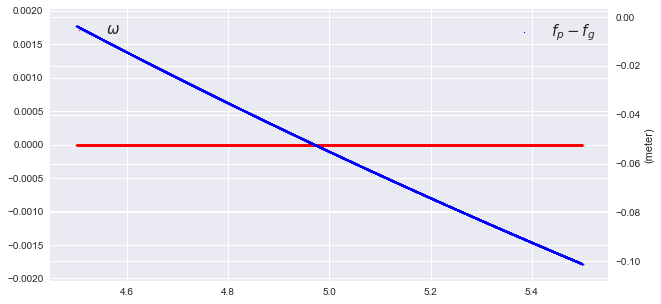

In [4]:
from nei import *
def omega_chi(chi_range=[-90,90],theta=None,nu=None,R=None,f_s=None,T=None):
    """
    theta: Bragg angle of the energy reflected at entering the crystal (the top polychromatic ray)
    nu: Poisson ratio
    R: Bend radius
    f_s: Source distance
    T: crystal thickness
    """
    
    theta = np.radians(theta)
    chi = np.radians(np.linspace(chi_range[0],chi_range[-1],18001))
    # polychromatic focus function
    f_p = (R*np.sin(2.0*theta))/(2.0*np.sin(chi+theta)+(1+nu)*np.sin(2.0*chi)*np.cos(chi+theta))
    # geometric focus function
    f_g = np.cos(chi-theta)/(np.cos(chi+theta)/f_s+2.0/R)
    
    # omega
    omega = (f_p-f_g)/(f_p-T)*T*(np.tan(theta+chi)+np.tan(theta-chi))
    return omega,f_p-f_g

chi_range=[4.5,5.5]
omega,delta_f = omega_chi(chi_range=chi_range,theta=8.99,nu=0.2,R=2,f_s=22,T=0.0003)
chi = np.linspace(chi_range[0],chi_range[-1],18001)
plt.figure(figsize=(10,5))
plt.scatter(chi,omega,s=1,color='r',label='$\omega$')
plt.legend(loc=2,prop={'size':15})
plt.twinx()
plt.scatter(chi,delta_f,s=1,color='b',label='$f_p - f_g$')
plt.xlabel('$\chi$ (degree)')
plt.ylabel('(meter)')
plt.legend(prop={'size':15})

[-5.85545052e-06 -5.85545052e-06 -5.85545052e-06 ... -5.85545052e-06
 -5.85545052e-06 -5.85545052e-06]


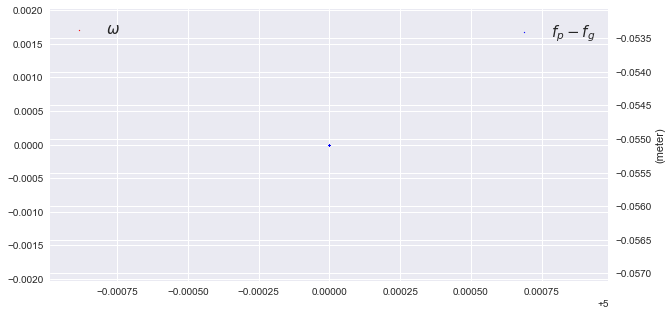

In [6]:
from nei import *
def omega_chi(chi_range=[-90,90],theta=None,nu=None,R=None,f_s=None,T=None):
    """
    theta: Bragg angle of the energy reflected at entering the crystal (the top polychromatic ray)
    nu: Poisson ratio
    R: Bend radius
    f_s: Source distance
    T: crystal thickness
    """
    
    theta = np.radians(theta)
    chi = np.radians(np.linspace(chi_range[0],chi_range[-1],18001))
    # polychromatic focus function
    f_p = (R*np.sin(2.0*theta))/(2.0*np.sin(chi+theta)+(1+nu)*np.sin(2.0*chi)*np.cos(chi+theta))
    # geometric focus function
    f_g = np.cos(chi-theta)/(np.cos(chi+theta)/f_s+2.0/R)
    
    # omega
    omega = (f_p-f_g)/(f_p-T)*T*(np.tan(theta+chi)+np.tan(theta-chi))
    return omega,f_p-f_g

chi_range=[5,5]
omega,delta_f = omega_chi(chi_range=chi_range,theta=8.99,nu=0.2,R=2,f_s=22,T=0.0003)
print(omega)
chi = np.linspace(chi_range[0],chi_range[-1],18001)
plt.figure(figsize=(10,5))
plt.scatter(chi,omega,s=1,color='r',label='$\omega$')
plt.legend(loc=2,prop={'size':15})
plt.twinx()
plt.scatter(chi,delta_f,s=1,color='b',label='$f_p - f_g$')
plt.xlabel('$\chi$ (degree)')
plt.ylabel('(meter)')
plt.legend(prop={'size':15})

In [7]:
saved = load_object(r'C:\Users\qcyus\Downloads\Xdata\Pod_Tubes_CT 2_1 Slice\save\2018-11-13\13-50-28\save.pkl')
exy = saved.beam_parameters.exy
((exy.max(axis=0)-exy.min(axis=0))/exy.shape[0]).mean()

0.00037637267176879845